<a href="https://www.kaggle.com/code/leslievald/ny-attendance-trends-18-19?scriptVersionId=182664447" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **New York Attendance Trends 2018-2019**

## Table of Contents

- [Background](#background)
- [Business Task](#business-task)
- [Dataset Integrity Check and Cleaning Preparation](#dataset-integrity-check-and-cleaning-preparation)
- [Research Insights](#research-insights)
- [Cleaning and Processing](#cleaning-and-processing)
- [Analysis and Visualization](#analysis-and-visualization)
- [Overall Summary](#overall-summary)
- [Conclusion and Recommendation](#conclusion-and-recommendation)

## **Background** <a id="background" ></a>

This dataset is pivotal for understanding the daily attendance trends, student engagement, and operational dynamics of the New York school environment over the 2018-2019 academic year. It contains daily counts of the students registered, present, absent, and released. Analyzing patterns over time and across the different schools will help identify critical issues such as chronic absenteeism and the impact of external factors on student attendance. Various analyses will be performed on this dataset to extract meaningful insights, including: a time series analysis, examining data across time to identify trends, seasonal patterns, or anomalies in student attendance, and correlation analysis, to explore correlations between attendance rates and other variables, possibly external, like local events, weather conditions, or public health issues.

## **Business Task** <a id="business-task" ></a>

Identify attendance trends throughout one particular pre-covid academic year, 2018-2019, and develop insights to help minimize attendance on “dip” days. Given the short amount of time since the cultural shift due to COVID conditions in 2019 , the analysis should focus on a controlled environment, pre quarantine, for this particular analysis. Translate into a strategy for maximizing effect of instruction hours.

Main questions and concerns: 
* What days, months, and seasons are the highest in absences?
* Do holiday edge-days stand out in absences, or hold a prominent pattern?
* What other days stand out?
* Are there correlations in the data with weather patterns, local events, or other?

### **Deliverables**

A report with the following:
* Clear business task
* Description of all data sources used
* Documentation of cleaning and manipulation of data
* Supporting visualizations of key findings
* Summary of analysis
* Top high-level recommendations based on analysis

### **Stakeholders**

* Primary: Lead Attendance Officers
* Secondary: NYC Public School System

## **Dataset Integrity check and Cleaning preparation** <a id="dataset-integrity-check-and-cleaning-preparation" ></a>

#### Tools
* BigQuery - Data cleaning and manipulation
* Google Sheets - Data analysis and visualization

### **Data Source & Integrity**

#### *Reliability*

To ensure the reliability of the data, the NYC Department of Education employs standardized data collection procedures across all schools. Attendance data is recorded daily by school administrators and verified through regular audits and cross-checks. The following measures were taken to ensure data accuracy and consistency:
* Accuracy: Data entry protocols ensure that attendance records are accurately recorded and updated.
* Consistency: The data is consistently formatted and standardized across different schools and reporting periods.
* Validity: Attendance measures are validated against official school records and state guidelines.
* Completeness: The dataset includes comprehensive attendance records for all days within the academic year.
* Timeliness: Attendance data is collected and reported promptly, with minimal delays.

#### *Originality*

The data used in this report was obtained from the NYC Department of Education, which publishes detailed school attendance records annually. This dataset includes daily attendance figures for all public schools in NYC for the 2018-2019 academic year. As this data is collected directly by the NYC Department of Education, it is considered original data.

#### Analysis does not include:
* Attendance goals from districts for a strategy on budgetary planning
* School districts outside of NYC boroughs’ public schools
* Data outside of 2018-2019 school year
* Student release rate analysis
* Post-COVID19 impact to attendance trends
* Attendance trends compared across different boroughs or varying enrollment size/quartile

#### Data collection period:
Updated quarterly (last month, May 2024)
Original collection by individual districts’ attendance operations offices

#### Datatset Citation:
https://www.kaggle.com/datasets/sahirmaharajj/school-student-daily-attendance

#### Data set observations

* Schema
* School borough
* School year date from mm/dd/2018-mm/dd/2019
* Enrolled
* Absent 
* Present
* Released

Unique Schools: 1583
Enrollment Range: 1 - 5955


## **Research insights** <a id="research-insights" ></a>

### New York City borough code

District, Borough, School number

Ex. 10X228 -> District 10 in Bronx, school #228
* K - Brooklyn
* X - Bronx
* Q - Queens
* M - Manhattan
* R - Staten Island

What is a DBN (District Borough Number)? - NYC Public Schools
https://teachnyc.zendesk.com/hc/en-us/articles/360053601831-What-is-a-DBN-District-Borough-Number#:~:text=The

### Holidays and Short Days in 2018-2019 NYC Academic Year

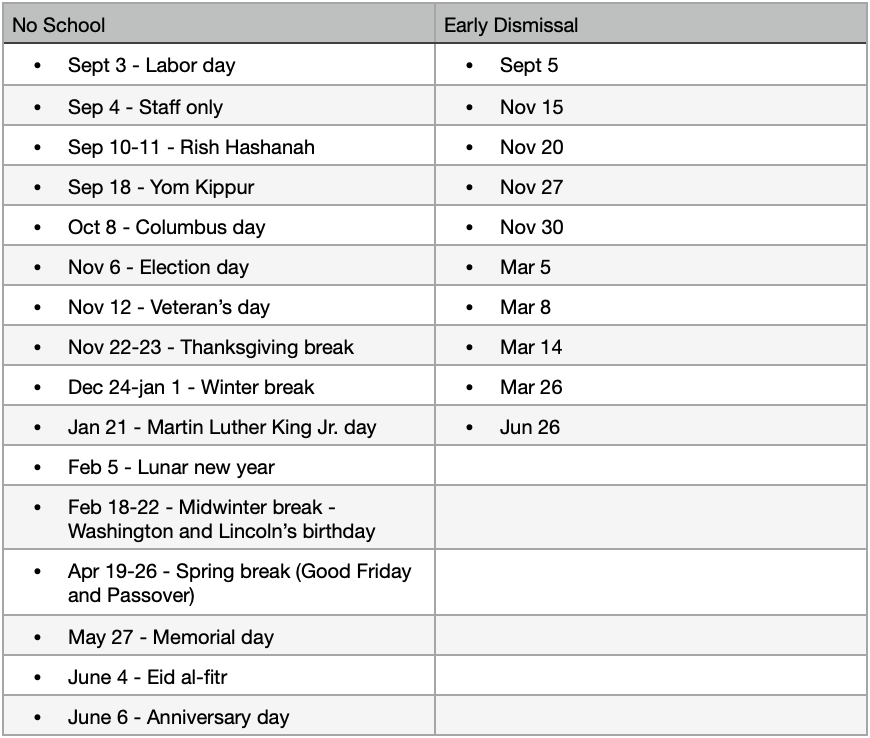

Holidays in NY 2018-2019 - Department of Education
https://infohub.nyced.org/docs/default-source/default-document-library/school-calendar-2018-2019.pdf

### "Released" students

#### *Speculation*
"Released" meaning
* Student’s family moved and unenrolled to a new district, for reasons ranging from cost of living to divorce -> insight provided by T. Hamilton of Kipp Austin Collegiate, HS Operations Manager
* Student was signed out early by parent or guardian before the final bell
* Student was suspended due to behavioral issues

## **Cleaning and Processing** <a id="cleaning-and-processing" ></a>

Average Enrollment: 597

First day of school: Sept 5, 2018 (9/4 for only 10X228)
Last day of school: Jun 26, 2019 (for most schools: 1,561)

No School/No data
Jan 1, 2018 - Sep 3, 2018
Jun 27 2019 - Dec 31, 2019

### **Data Manipulation**

Separated into seasons: 4 new datasets
* Fall 2018: Sept, Oct, Nov
* Winter 18-19: Dec, Jan, Feb
* Spring 2019: Mar, Apr, May
* Summer 2019: Jun, Jul, Aug


In [1]:
# Fall 2018 

# SELECT *

# FROM `meta-buckeye-421822.DailyAttendance_2018_2019.Fall 2018`

# WHERE (Date > 20180901) AND (Date < 20181131) 

## **Analysis and Visualization** <a id="analysis-and-visualization" ></a>

Top 25 entries for Highest Absences - Complete data
* Skewed towards larger schools with high enrollment
* Green cells highlight recurring dates

#### *Top 25 Daily Absences - Fall*

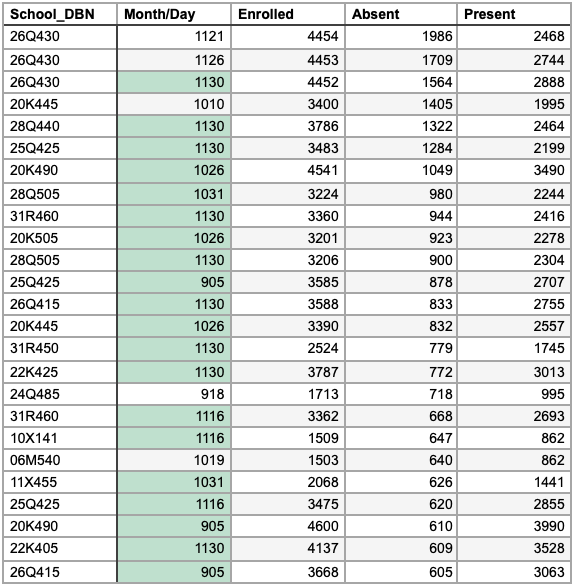


In [2]:
# Top 25 Results for Highest Absences

# SELECT *

# FROM `meta-buckeye-421822.DailyAttendance_2018_2019.Fall 2018` 

# ORDER BY Absent DESC

# LIMIT 25

Top 25 entries for Highest Absence Percentage - Complete data 
* Skewed towards smaller schools with low enrollment
* Green cells highlight recurring dates

#### *Top 25 Daily Absence % (out of Enrolled) - Fall*

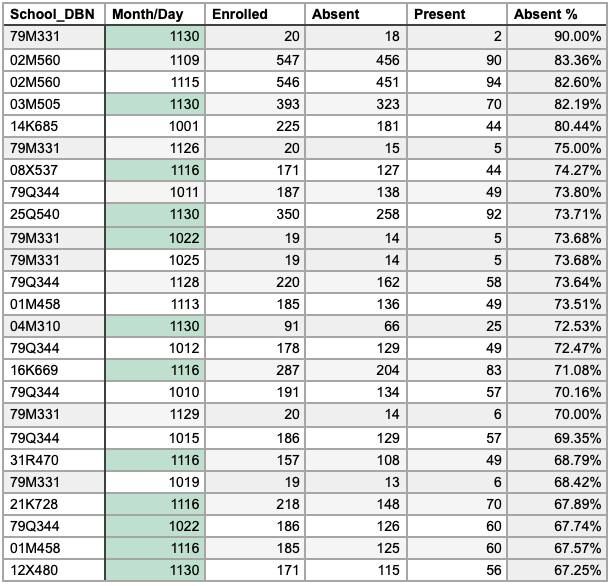


In [3]:
# Top 25 Results for Highest Absence Percent

# SELECT *

# FROM `meta-buckeye-421822.DailyAttendance_2018_2019.Fall 2018` 

# ORDER BY (Absent/Enrolled)*100 DESC

# LIMIT 50

#### *Speculation*

Finding the top 25 highest days of absences skews results towards larger schools with high enrollment. Finding the top 25 highest days of absence percentage out of total enrollment skews towards smaller schools with low enrollment. 

Create sample of data within two, then one standard deviation to trim outliers and identify true “dip” days. One standard deviation holds the more common enrollment sizes, closer to the average of 597. Will continue exploring top 25 highest absence percentage days across all schools.

In [4]:
# Data within 1 σ : 68.75% of total population
# 200-700 Enrollment

# SELECT *

# FROM `meta-buckeye-421822.DailyAttendance_2018_2019.Fall 2018` 

# WHERE (Enrollment > 200) AND (Enrollment < 700)

# ORDER BY (Absent/Enrollment)*100 DESC

# LIMIT 15

#### *Top 15 Daily Absence % within 1 σ - Fall*

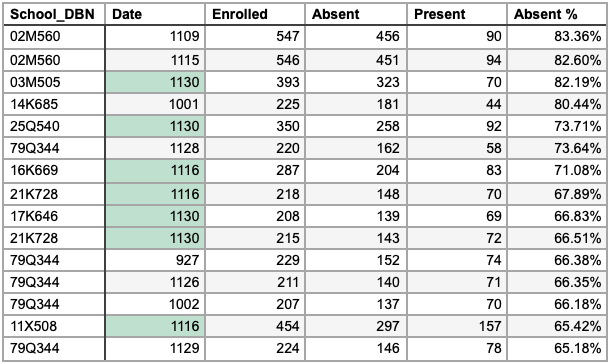

*school enrollment size 200-700

#### *Top 25 Daily Absence % within 2 σ - Fall*

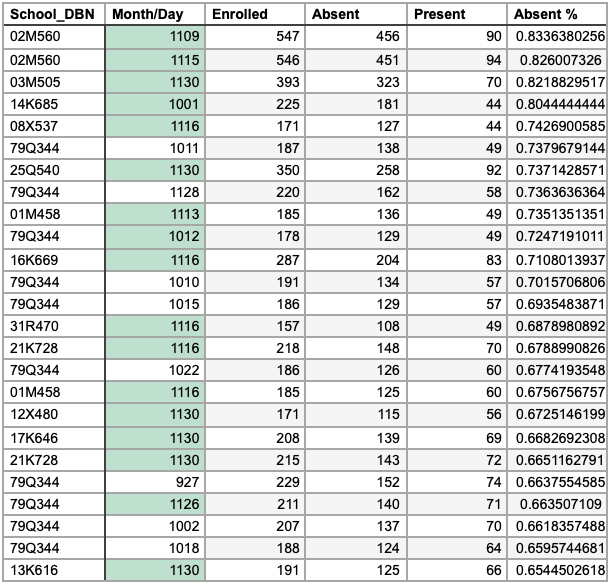

*school enrollment size 100-1500

In [5]:
#Top 25 Total Absences across All schools for entire academic year 

# SELECT 
# Dates, 
# SUM( Absent ) AS total_absences

# FROM `meta-buckeye-421822.DailyAttendance_2018_2019.Attendance_2018-2019`

# GROUP BY Date

# ORDER BY 
# Total_absences DESC

# LIMIT 25



### **Top “dip” days** 

Provided year-wide ranking for total absences for the top 15 dates

#### *Fall*
* Nov 16 - Early season winter storm - light rain, low of 34° F (Fri) (#5) *
* Nov 15 - Early season winter storm - overcast, low of 30° F (Thur) (#9) *
* Nov 21 - Day before Thanksgiving recess (Wed)
* Oct 31 - Halloween day (Wed)
* Sep 05 - First day of school, early release (Wed)
* Nov 30 - Early dismissal for High schools (Fri)
* Sep 07 - First week of school (Fri), five day weekend for Rosh Hashanah (Jewish holiday)
* Sep 06 - First full day of school (Thur), six day weekend for Rosh Hashanah (Jewish holiday)
* Sep 25 - *Adjustment period at beginning of the year? (Tues)*
* Sep 28 - *Adjustment period at beginning of the year? (Fri)*

*Weather Forecast on Week of early winter storm* *

Weather report: Nov 15-16, 2018 
https://www.timeanddate.com/weather/usa/new-york/historic?month=11&year=2018

#### *Winter*
* Jan 31 - Winter storm - low of 3° F (Thur) (#1) *
* Dec 21 - Day before Winter recess (Fri) (#2)
* Jan 02 - Day after Winter recess (Wed) (#6)
* Feb 12 - Winter storm - Conflicting information from district v NYC Sanitation (Tue) (#11) **
* Jan 18 - Four day weekend for MLK day on following Mon (Fri)
* Feb 01 - Day after winter storm (Fri)
* Feb 15 - Day before Midwinter recess (Fri)
* Jan 04 - 3rd day after Winter recess (Thur)
* Jan 03 - 2nd day after Winter recess (Fri)
* Jan 11 - *Winter storm? - low of 21° F (Fri)*

*Weather Forecast on Week of winter storm* *

Weather report: January 31, 2019
https://www.timeanddate.com/weather/usa/new-york/historic?month=1&year=2019


*Social media correspondence:* Feb 12, 2019 **

https://x.com/NYCSchools/status/1095097712175767552 

https://x.com/NYCSanitation/status/1095019947674218498

#### *Spring*
* Mar 14 - Early dismissal for Elementary schools (Thur) (#12)
* Apr 18 - Day before Spring recess (Thur)
* May 24 - Four day weekend for Memorial Day on following Mon (Fri)
* May 13 - *Spring activities like field trips and/or testing season? (Thur)*
* May 23 - Five day weekend for Memorial Day on following Mon (Thur)
* Mar 01 - *Spring activities like field trips and/or testing season? (Fri)*
* May 28 - day after day off (Tue)
* May 10 - *Spring activities like field trips and/or testing season? (Fri)*
* May 17 - *Spring activities like field trips and/or testing season? (Fri)*
* Mar 08 - Early dismissal for High schools (Fri)

#### *Summer*
* Jun 26 - Last day of school (Wed) (#2)
* Jun 25 - Last week of school (Tue) (#3)
* Jun 24 - Last week of school (Mon) (#13)
* Jun 07 - Friday after no school on Thur for Anniversary/Chancellor’s Conference day (#8)
* Jun 17 - *End of Year events? (Mon) (#7)*
* Jun 05 - Wednesday before no school on Thur for Anniversary/Chancellor’s Conference day (#10)
* Jun 21 - Friday before last week of school
* Jun 10 - Monday before no school on Tue for June Clerical day (#14)
* Jun 14 - *End of Year events? (Fri) (#15)*
* Jun 13 - *End of Year events? (Thur)*

### **Summary**

* Summer is highest in top absence days: eight from top 15 year-round days, four from top 10. 
* Winter follows: four days from top 15, three from top 10.
* Spring is last: only one from top 15. 

### **Total Absences across All Schools over Entire Academic Year (185 days)**

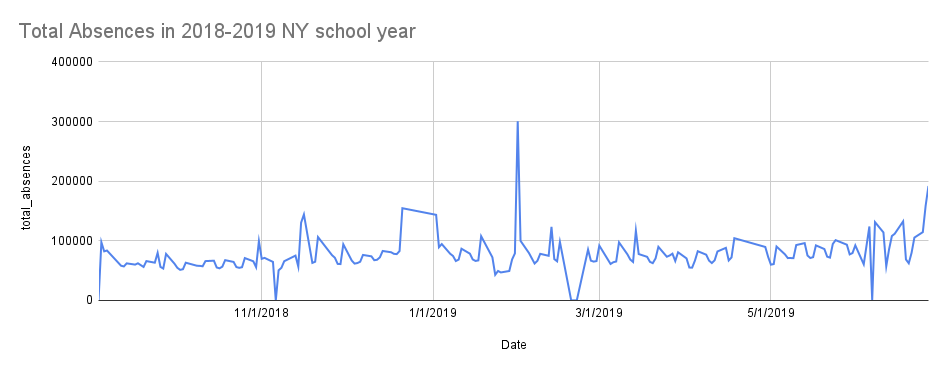

Line graph covers Sept 2018 through June 2019
* Above table pulls vertical axis too high due to snow storm on Jan 31 
* Near-zero absence days also prevent pattern emergence
    * Absence rate is due to very few schools open for election day, midwinter break, and anniversary day

*—> hidden for further analysis*

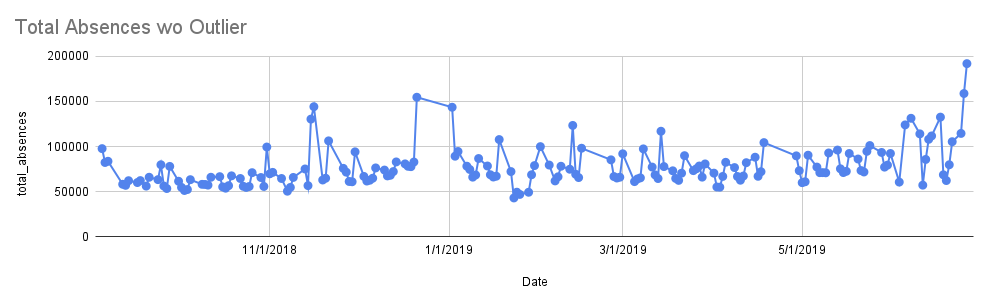

Thanksgiving, winter break, and end of year stand out for total absences

*—> hidden for further analysis*

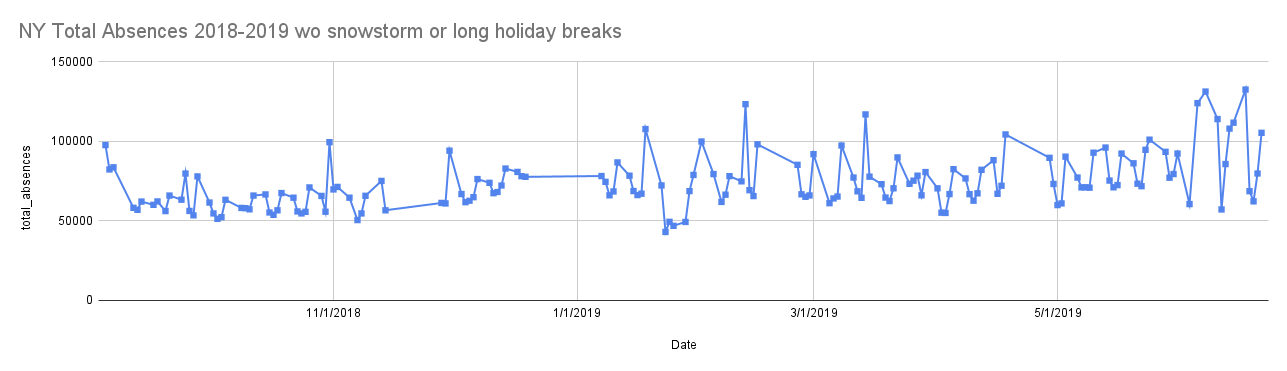

### **Summary**

* Without outliers, an upward trend in absences can be observed as the academic year progresses
* Winter storms cause the absolute highest total absences, followed by end-of-year absences, then winter break, then thanksgiving break

In [6]:
# Counting Absences by Day of the Week

# SELECT 
# FORMAT_DATE(‘%a’, PARSE_DATE(‘%Y%m%d’, CAST(Date AS STRING))) AS day_of_week , 
# SUM(Absent) AS count

# FROM ‘table’

# GROUP BY day_of_week

# ORDER BY count DESC

### **Day-of-the-Week distribution across all schools**

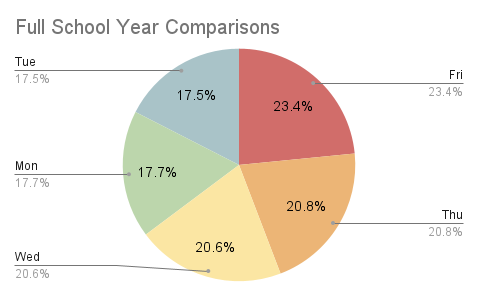
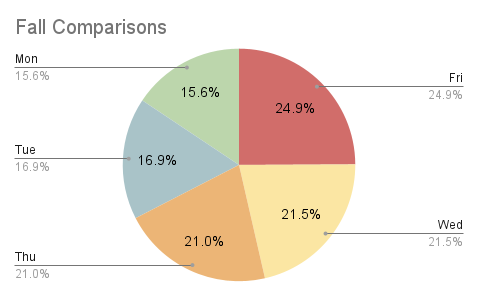

### **Summary** 

* Every season has around 55 days, except summer with only 17.
* Friday is the top day of the week for absences overall.
* Summer and winter’s top spot were skewed due to last day of school and winter storm.
* Monday and Tuesday are consistently at the bottom, except during Summer when Monday is frequently “dipped” for four-day weekends. 

## **Overall Summary** <a id="overall-summary" ></a>

Based on the analysis of attendance data for NYC schools during the 2018-2019 academic year, several key trends and patterns have emerged:

### Day of the Week Patterns:

* Fridays: The highest absences overall occur on Fridays.
* Mondays and Tuesdays: Generally have the lowest absences, except during summer when Mondays are often skipped to create four-day weekends.

### Seasonal Trends:

* Progressive Increase: An upward trend in absences is observed as the academic year progresses, excluding outlier events.
* Summer: Eight of the top 15 days with the highest absences fall in summer, including four of the top 10.
* Winter: Four days from the top 15 and three from the top 10 fall in winter.
* Spring: Only one day from the top 15 falls in spring.

### Impact of Weather and Holidays:

Winter Storms: Lead to the highest total absences.
Holiday Breaks: Absences peak around the end of the year, winter break, and Thanksgiving break.

## **Conclusion and Recommendation** <a id="conclusion-and-recommendation" ></a>

### Key Absence Trends:

* Holiday Breaks: Weeks before and after longer holiday breaks see increased absences.
* Mid-week Days Off: Disrupt the entire week more than days off at the beginning or end of the week.
* Extended Weekends: Students frequently take days off to create four-day weekends.
* End of Year: The end of the academic year and the two weeks prior have the highest absence rates.
* Coordinated School Closures: Absence rates are higher when other schools are also closed.
* Severe Weather: Snowstorms cause the highest absence rates.

### Recommendations:

* **Lesson Planning:** Design more flexible lesson plans around larger breaks to accommodate increased absences.
* **Scheduling:** Avoid scheduling days off in the middle of the week, including early dismissals.
    Consider beginning classes at the start of the week after breaks.
* **Assessment Scheduling:** Schedule exams or major project deadlines on Fridays before a Monday off or on Mondays following a Friday off to encourage attendance.
* **Event Timing:** Reserve non-mandatory events for the end of the school year when absences are already high.
* **Coordination with Other Schools:** Work with other schools in the borough to align schedules, helping families with children in multiple schools manage attendance better.
* **Snow Day Communication:** Implement a clear and efficient system for communicating snow day information to parents and students.
* **Attendance Goals:** Set specific attendance goals and identify feasible days to improve attendance, excluding unavoidable low-attendance days.
* **Parent Surveys:** Conduct surveys to understand how other school schedules and early dismissal days affect attendance, and use this data to inform scheduling decisions. 

By implementing these recommendations, schools can better manage attendance and mitigate the impact of high-absence days on student learning outcomes.



#### *References*

https://infohub.nyced.org/docs/default-source/default-document-library/school-calendar-2018-2019.pdf

https://teachnyc.zendesk.com/hc/en-us/articles/360053601831-What-is-a-DBN-District-Borough-Number#:~:text=The

https://www.timeanddate.com/weather/usa/new-york/historic?month=1&year=2019
